# Welcome to part 1 of our project on the representation of females in media

In [1]:
# Libraries to import
import pandas as pd
import numpy as np
import matplotlib as matplot
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pickle
from scipy.stats import ttest_ind
import math

# Supress warnings
import warnings
warnings.filterwarnings("ignore")


#interactive plots
import plotly.express as px
import plotly as py
import plotly.io as pio
import plotly.graph_objects as go
import bar_chart_race as bcr

# Networkx
import networkx as nx
from pyvis import network
from pyvis.network import Network
import matplotlib.image as mpimg

# Import function from our util file
from M3_utils import *

In [2]:
palette_gender =['#529dc8', '#cc78bc'] #Male, Female
sns.set_palette(sns.color_palette(palette_gender))
sns.color_palette(palette_gender) #to visualize colors

palette_countries = ['#E5B25D', '#c13639', '#029e73'] #UK, USA, SA
sns.set_palette(sns.color_palette(palette_countries))
sns.color_palette(palette_countries) #to visualize colors

palette_media = ['#7D858D', '#dc6e57'] #Respected, Popular
sns.set_palette(sns.color_palette(palette_media))
sns.color_palette(palette_media) #to visualize colors

palette_cat = ['#7570b3', '#e7298a', '#90BE6D', '#ece133', '#F48C06', '#023E8A', '#442220'] #order whatever
sns.set_palette(sns.color_palette(palette_cat))

In [3]:
# Colors used for the plots with popular and respected media as well as female and male
popular_color = sns.color_palette(palette_media)[1]
respect_color = sns.color_palette(palette_media)[0]
female_color = sns.color_palette(palette_gender)[1]
male_color = sns.color_palette(palette_gender)[0]

In [4]:
#Settings for the non-interactive plots 
sns.set_style("ticks")
colors = sns.color_palette('colorblind')
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14) 
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=18)
plt.rcParams['ytick.major.size'] = 7
plt.rcParams['ytick.minor.size'] = 6

sns.set_style("darkgrid", {'axes.grid' : False, 'ytick.left': True, 'xtick.bottom': True})

In [5]:

DATA_PATH = '../data/'

DATA_PATH2015 = DATA_PATH + 'data2015/'
DATA_PATH2016 = DATA_PATH + 'data2016/'
DATA_PATH2017 = DATA_PATH + 'data2017/'
DATA_PATH2018 = DATA_PATH + 'data2018/'
DATA_PATH2019 = DATA_PATH + 'data2019/'
DATA_PATH2020 = DATA_PATH + 'data2020/'

FILE2015 = DATA_PATH2015 + 'M3_df_2015_complete.pkl'
FILE2016 = DATA_PATH2016 + 'M3_df_2016_complete.pkl'
FILE2017 = DATA_PATH2017 + 'M3_df_2017_complete.pkl'
FILE2018 = DATA_PATH2018 + 'M3_df_2018_complete.pkl'
FILE2019 = DATA_PATH2019 + 'M3_df_2019_complete.pkl'
FILE2020 = DATA_PATH2020 + 'M3_df_2020_complete.pkl'

FILES = [FILE2015, FILE2016, FILE2017, FILE2018, FILE2019, FILE2020]

In [ ]:
with open(FILE2015, 'rb') as input_file:
    df_2015 = pickle.load(input_file)

In [ ]:
with open(FILE2016, 'rb') as input_file:
    df_2016 = pickle.load(input_file)

In [ ]:
with open(FILE2017, 'rb') as input_file:
    df_2017 = pickle.load(input_file)

In [ ]:
with open(FILE2018, 'rb') as input_file:
    df_2018 = pickle.load(input_file)

In [ ]:
with open(FILE2019, 'rb') as input_file:
    df_2019 = pickle.load(input_file)

In [ ]:
with open(FILE2020, 'rb') as input_file:
    df_2020 = pickle.load(input_file)

# Here I need to add the code for computing the origine media

In [ ]:
df_origin_media = pd.concat([df_2015, df_2016, df_2017, df_2018, df_2019, df_2020])

## Find countries with interesting properties regarding female quotes

In [ ]:
plot_quotes_media_country(df_origin_media_gender)

In [ ]:
df_origin_media_gender, df_female_prop = add_female_percentage(df_origin_media)
df_female_prop.head(2)

#### Let's plot the proportion of females quoted based on the country of the media



In [20]:
list_countries = ['United Kingdom','United States of America','South Africa']

colors = [palette_countries[0] if country == list_countries[0] 
            else palette_countries[1] if country == list_countries[1] 
            else palette_countries[2] if country == list_countries[2] 
            else '#495057' for country in df_female_prop['media_country']]
fig = px.bar(df_female_prop,'media_country','Female %',
             labels={"species": "countries of interest"},
             color_discrete_sequence = [colors],
             width = 1000, height = 600)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.update_layout(title=dict(
                            text="Mean percentage of Female quotes over all years (2015 -2020) for each media's country",
                            font_size=19,
                            yanchor="top",
                            y=0.99,
                            xanchor="left",
                            x=0.08),
                  yaxis = dict(
                            title="Mean percentage of Female quotes",
                            titlefont_size=15),
                  xaxis = dict(
                            title="Media's countries",
                            titlefont_size=15,
                            tickangle = -45),
                  legend=dict(
                            title="Countries of interest",
                            orientation="v",
                            yanchor="bottom",
                            y=0.8,
                            xanchor="left",
                            x=1.05,
                            font_size = 13))

#py.graph_objects.layout.polar.AngularAxis(direction='clockwise', rotation = 180)
fig.show()


NameError: name 'df_female_prop' is not defined

In [ ]:
pio.write_html(fig, file='images_website/Mean_percentage_Female_quotes.html', auto_open=False)

### 2 main questions appear after this plot:
##### Why are there such huge differences in the representation of females in the media between the United States and the United Kindom ? 
##### Why is South Africa better in terms of representation of females in the media than United States ? 
- Dig into ages? (years separately and on average)
- Dig into categories? (years separately and on average)
- Dig into Unique speakers? see if countries tend to quote many times the same person 

#### Import Data only for countries of interest: 'United Kingdom','United States of America', 'South Africa'

TODO: Add the code to get the cleaned dataframe

In [6]:

FILE2015_UUS = DATA_PATH2015 + 'UK_USA_SA_2015_clean.pkl'
FILE2016_UUS = DATA_PATH2016 + 'UK_USA_SA_2016_clean.pkl'
FILE2017_UUS = DATA_PATH2017 + 'UK_USA_SA_2017_clean.pkl'
FILE2018_UUS = DATA_PATH2018 + 'UK_USA_SA_2018_clean.pkl'
FILE2019_UUS = DATA_PATH2019 + 'UK_USA_SA_2019_clean.pkl'
FILE2020_UUS = DATA_PATH2020 + 'UK_USA_SA_2020_clean.pkl'

FILES_UUS = [FILE2015_UUS, FILE2016_UUS, FILE2017_UUS, FILE2018_UUS, FILE2019_UUS, FILE2020_UUS]
list_countries = ['United Kingdom','United States of America','South Africa']

In [7]:
with open(FILE2015_UUS, 'rb') as input_file:
    df_2015_UUS = pickle.load(input_file)

In [8]:
with open(FILE2016_UUS, 'rb') as input_file:
    df_2016_UUS = pickle.load(input_file)

In [9]:
with open(FILE2017_UUS, 'rb') as input_file:
    df_2017_UUS = pickle.load(input_file)

In [10]:
with open(FILE2018_UUS, 'rb') as input_file:
    df_2018_UUS = pickle.load(input_file)

In [11]:
with open(FILE2019_UUS, 'rb') as input_file:
    df_2019_UUS = pickle.load(input_file)

In [12]:
with open(FILE2020_UUS, 'rb') as input_file:
    df_2020_UUS = pickle.load(input_file)

## Gather all years in one single dataframe

In [13]:
df_UK_USA_SA_all_years = pd.concat([df_2015_UUS, df_2016_UUS, df_2017_UUS, df_2018_UUS, df_2019_UUS, df_2020_UUS])
df_list_USS = [df_2015_UUS,df_2016_UUS,df_2017_UUS,df_2018_UUS,df_2019_UUS,df_2020_UUS]

## Dig into Age 

In [14]:
df_2015_age_range = create_df_age_range(df_2015_UUS)
df_2016_age_range = create_df_age_range(df_2016_UUS)
df_2017_age_range = create_df_age_range(df_2017_UUS)
df_2018_age_range = create_df_age_range(df_2018_UUS)
df_2019_age_range = create_df_age_range(df_2019_UUS)

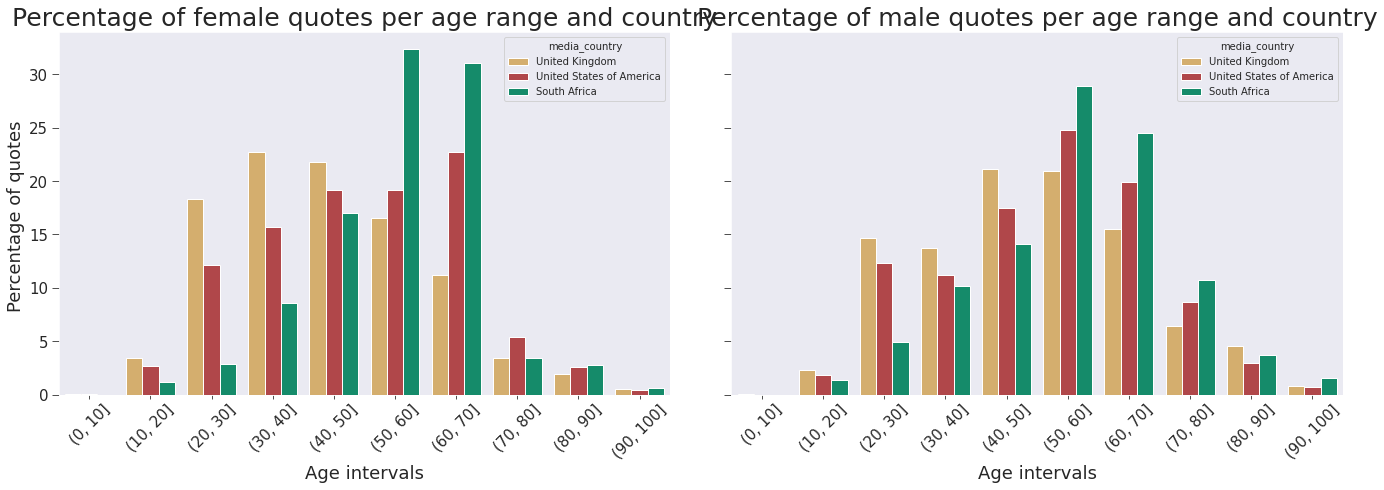

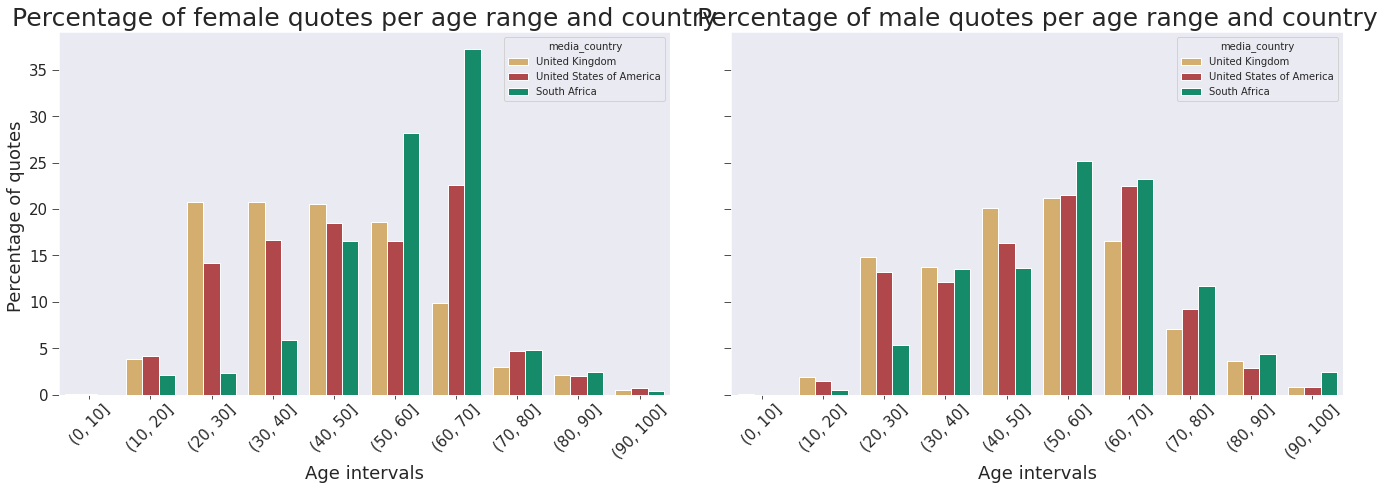

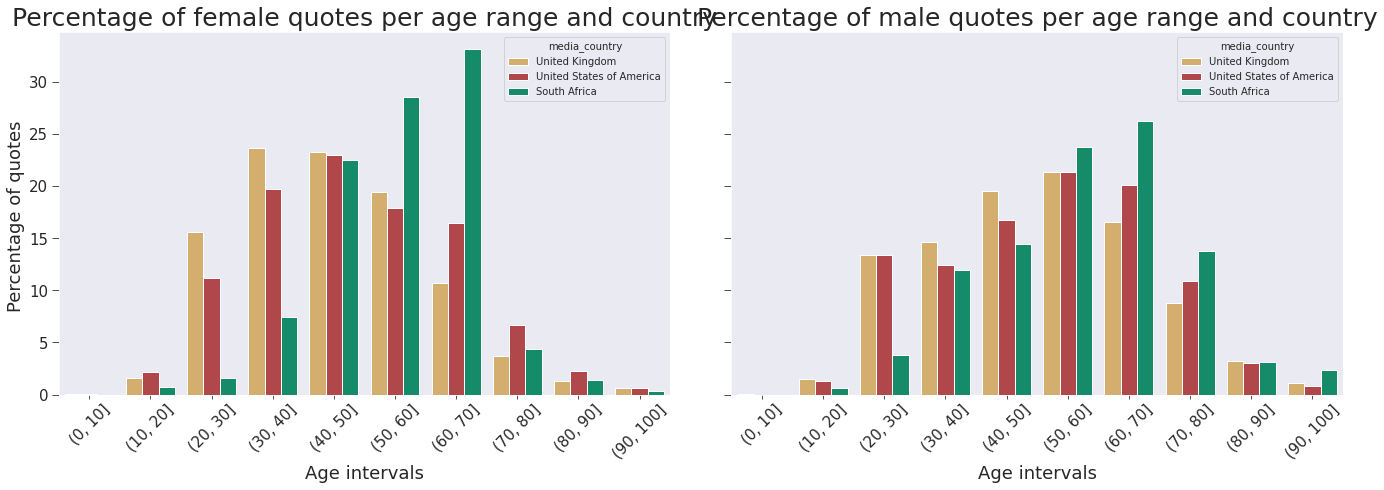

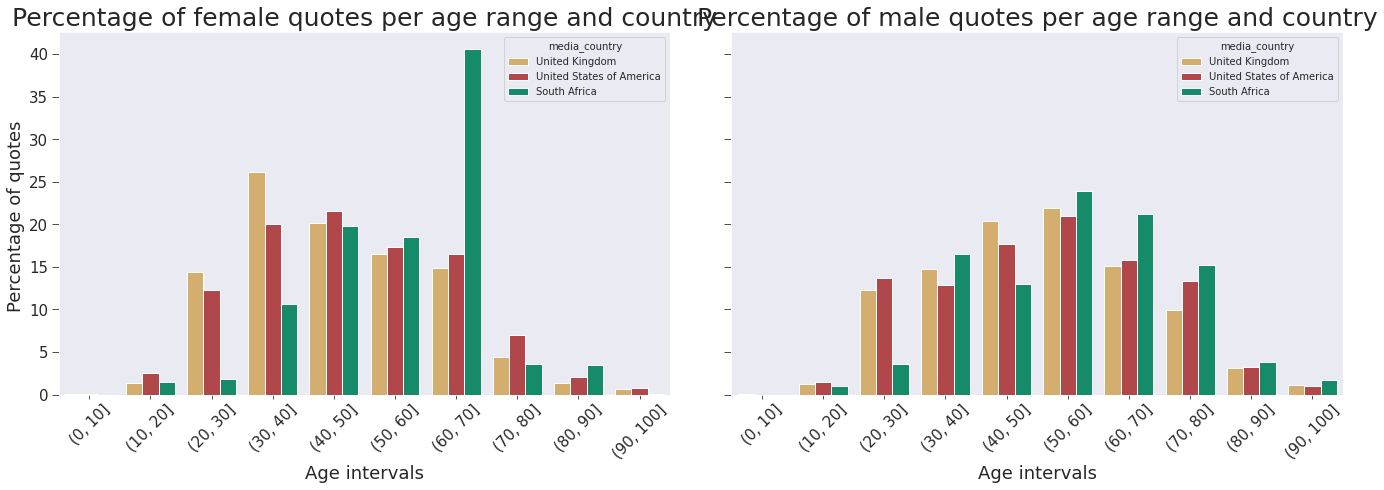

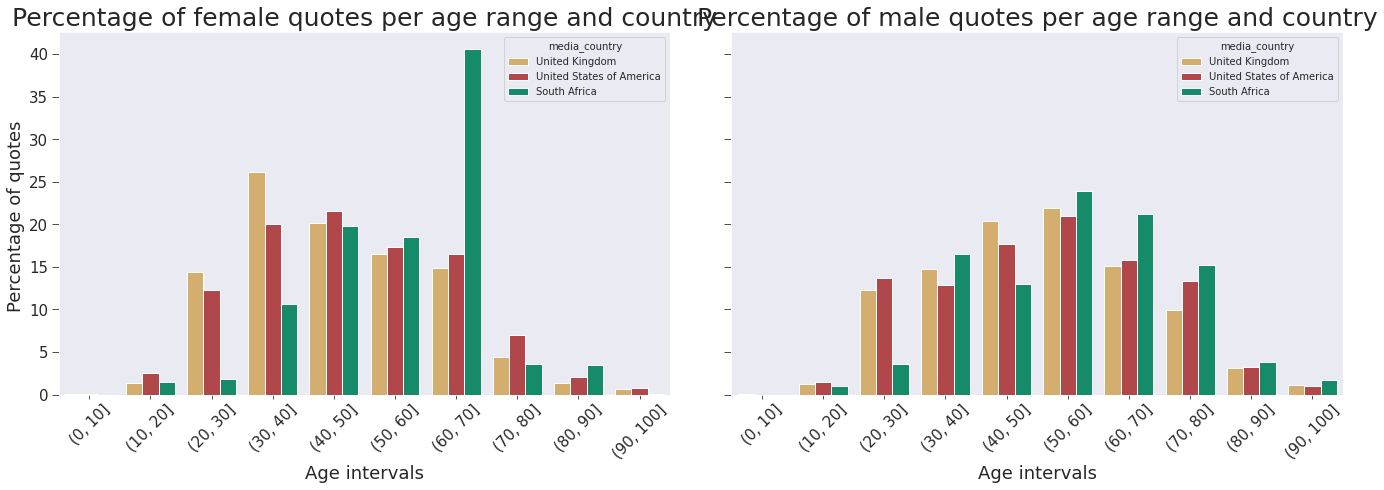

In [16]:
plot_quotes_age(df_2015_age_range, age_threshold = 100)
plot_quotes_age(df_2016_age_range, age_threshold = 100)
plot_quotes_age(df_2017_age_range, age_threshold = 100)
plot_quotes_age(df_2018_age_range, age_threshold = 100)
plot_quotes_age(df_2018_age_range, age_threshold = 100)

### All graphs are quite similar. Consider the average over all years in one single, interactive plot

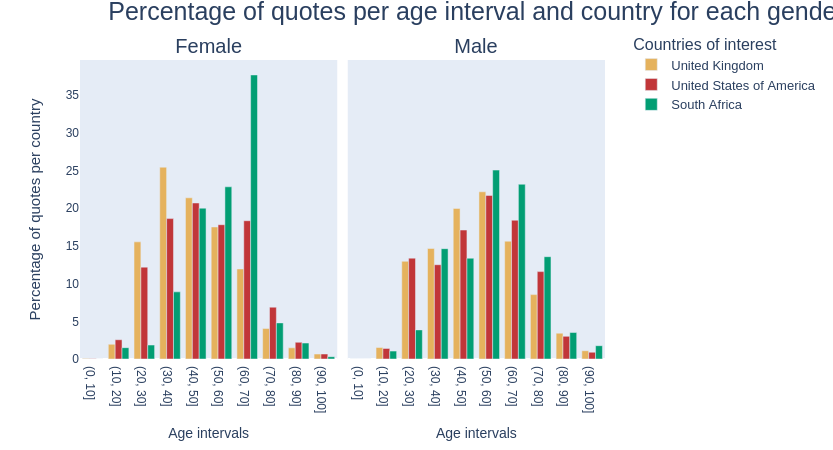

In [21]:
df_all_years_age_range = create_df_age_range(df_UK_USA_SA_all_years)

#to enable x-axis as age_range in plotly, no intervals allowed, transform it to string
df_all_years_age_range['str_age_range'] = df_all_years_age_range['age_range'].astype(str)

fig = px.bar(df_all_years_age_range ,x='str_age_range',y='Proportion', color = 'media_country', barmode="group",
                 facet_col="gender", labels={"species": "countries of interest"},
                 category_orders={"gender":["Female", "Male"], 
                                  "media_country": ["United Kingdom", "United States of America", "South Africa"]},
                 color_discrete_sequence = palette_countries,
                 width = 1400, height = 450)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1], font_size=20))
fig.for_each_xaxis(lambda a: a.update(title= 'Age intervals'))
fig.update_layout(title=dict(
                            text="Percentage of quotes per age interval and country for each gender",
                            font_size=25,
                            yanchor="top",
                            y=0.995,
                            xanchor="left",
                            x=0.13),
                  yaxis = dict(
                            title='Percentage of quotes per country',
                            titlefont_size=15),
                  legend=dict(
                            title="Countries of interest",
                            orientation="v",
                            yanchor="bottom",
                            y=0.8,
                            xanchor="left",
                            x=1.05,
                            font_size = 13))
    
fig.show()

In [23]:
pio.write_html(fig, file='images_website/Mean_percentage_Female_quotes_age.html', auto_open=False)

### 2 main conclusions from this plot:
##### High peak at 60-70 years old for Females in South Africa
##### Distribution is skewed to the left for female (towards younger age intervals) for UK whereas not for males, neither for american females.
- Look into unique speakers to tryy to explain these anomalies

# Dig into unique speakers
- Show the top speaker per country, age range and gender
- Show the top 3 speakers per country and gender

In [24]:
# Top speaker 

df_speaker = df_UK_USA_SA_all_years.groupby(["speaker", "media_country", "gender", "age_range"]).quoteID.count().to_frame().reset_index().sort_values(["media_country","quoteID"],ascending=False).rename({"quoteID":"Count"},axis=1)
df_top_speaker = df_speaker.groupby(["media_country", "gender", "age_range"]).head(1).reset_index(drop=True)
df_top_speaker = df_top_speaker.sort_values(['age_range']).drop(df_top_speaker[df_top_speaker['Count']==0].index)
df_top_speaker.head(2)

,speaker,media_country,gender,age_range,Count
18,Bana Alabed,United States of America,Female,"(0, 10]",115
39,Princess Charlotte,United Kingdom,Female,"(0, 10]",50
38,Prince George,United Kingdom,Male,"(0, 10]",52
19,Prince George,United States of America,Male,"(0, 10]",82
55,Greta Thunberg,South Africa,Female,"(10, 20]",56
50,Ronald Lamola,South Africa,Male,"(10, 20]",197
15,Greta Thunberg,United States of America,Female,"(10, 20]",1693
34,Kylie Jenner,United Kingdom,Female,"(10, 20]",791
14,David Brown,United States of America,Male,"(10, 20]",1693
31,Brendan Rodgers,United Kingdom,Male,"(10, 20]",1344


### Do all countries of interest quote about the same amount of female unique speakers relatively to the total of female quotes in that country ?

In [25]:
UK_only = df_speaker[(df_speaker['media_country'] == 'United Kingdom') & (df_speaker['gender'] == 'Female') & (df_speaker['Count'] != 0)].drop_duplicates('speaker')
USA_only = df_speaker[(df_speaker['media_country'] == 'United States of America') & (df_speaker['gender'] == 'Female') & (df_speaker['Count'] != 0)].drop_duplicates('speaker')
SA_only = df_speaker[(df_speaker['media_country'] == 'South Africa') & (df_speaker['gender'] == 'Female') & (df_speaker['Count'] != 0)].drop_duplicates('speaker')
print('UK:', round(len(UK_only)/UK_only['Count'].sum()*100, 2),
      '%, USA:', round(len(USA_only)/USA_only['Count'].sum()*100, 2),
      '%, SA:', round(len(SA_only)/SA_only['Count'].sum()*100,2),'%')

UK: 6.27 %, USA: 2.71 %, SA: 12.72 %


**Discussion**
- No, they don't, South Africa tends to have about two times more female unique speakers than United Kingdom, which again seems to have almost 3 times more female unique speakers than USA
- This is however in contradiction with the huge peak for South Africa in the plot for the 'age intevrals', as we would have expected one female in that interval to be very often quoted
- USA has the lower percentage and seems to quote some females only and not a diverse speacrtrum. 
- Since we only looked at an average percentage, this does not say anything about the age of the quoted females, South Africa has simply quoted many different females of the age interval (60-70).

### Look at the Top 3 now: per gender and country of media 

In [26]:
df_speaker_top_3 = df_speaker.groupby(["media_country", "gender"]).head(3).reset_index(drop=True)
df_speaker_top_3

,speaker,media_country,gender,age_range,Count
0,President Donald Trump,United States of America,Male,"(70, 80]",215570
1,Donald Trump,United States of America,Male,"(60, 70]",85914
2,President Trump,United States of America,Male,"(70, 80]",54440
3,Hillary Clinton,United States of America,Female,"(60, 70]",39966
4,Nancy Pelosi,United States of America,Female,"(70, 80]",27515
5,Sarah Huckabee Sanders,United States of America,Female,"(30, 40]",17931
6,Jeremy Corbyn,United Kingdom,Male,"(60, 70]",12487
7,Boris Johnson,United Kingdom,Male,"(50, 60]",9396
8,President Donald Trump,United Kingdom,Male,"(70, 80]",8976
9,Theresa May,United Kingdom,Female,"(60, 70]",5901


#### Donald Trump is on its own the top 3 of USA, with differnet names only, lets take it as one single person to avoid any problems in the future

In [27]:
renamed = []
for speaker in df_speaker_top_3['speaker']:
    if 'Trump' in speaker:
        renamed.append('Donald Trump')
    else:
        renamed.append(speaker)
df_speaker_top_3['speaker'] = renamed
df_speaker_top_3 = df_speaker_top_3.groupby(['speaker','media_country', 'gender']).Count.sum().to_frame().sort_values('Count', ascending=False).reset_index()
df_speaker_top_3['count_scaled'] = [df_speaker_top_3.iloc[idx]['Count']/USA_only['Count'].sum()*100 if (df_speaker_top_3.iloc[idx]['media_country'] =='United States of America')
                                else df_speaker_top_3.iloc[idx]['Count']/UK_only['Count'].sum()*100 if (df_speaker_top_3.iloc[idx]['media_country'] =='United Kingdom') 
                                else df_speaker_top_3.iloc[idx]['Count']/SA_only['Count'].sum()*100 
                                for idx in range(0,len(df_speaker_top_3))]
df_speaker_top_3

,speaker,media_country,gender,Count,count_scaled
0,Donald Trump,United States of America,Male,355924,25.035979
1,Hillary Clinton,United States of America,Female,39966,2.811240
2,Nancy Pelosi,United States of America,Female,27515,1.935427
3,Sarah Huckabee Sanders,United States of America,Female,17931,1.261281
4,Jeremy Corbyn,United Kingdom,Male,12487,4.101508
5,Boris Johnson,United Kingdom,Male,9396,3.086231
6,Donald Trump,United Kingdom,Male,8976,2.948277
7,Theresa May,United Kingdom,Female,5901,1.938256
8,Katie Price,United Kingdom,Female,4204,1.380855
9,Meghan Markle,United Kingdom,Female,3774,1.239616


### Ceate an interactive network to show Top-3 unique speakers per country differentiating the number of quotes for this speaker and the gender.
- size is related to the number of quotes in the country where they were mostly quoted
- colors are related to the gender

In [28]:
list_countries = ['United Kingdom','United States of America','South Africa']

age = df_UK_USA_SA_all_years[df_UK_USA_SA_all_years['speaker'].isin(list(df_speaker_top_3['speaker']))].drop_duplicates('speaker',keep='last')[['speaker','age']]
df_speaker_top_3 = df_speaker_top_3.merge(age, on='speaker', how='outer')
Top_3 = df_speaker_top_3.drop_duplicates('speaker', keep='last').reset_index(drop=True)

In [33]:
node_sizes = [int((10*((Top_3.iloc[idx]['count_scaled'])**(3/7)))) for idx in range(0,len(Top_3))]

node_colors = [male_color if Top_3.iloc[idx]['gender'] == 'Male' 
               else female_color if Top_3.iloc[idx]['gender'] == 'Female' 
               else 'grey' for idx in range(0,len(Top_3))]

titles = [str(int(Top_3.iloc[idx]['age']))+' years old and quoted '+ str(int(Top_3.iloc[idx]['Count']))+' times by '+Top_3.iloc[idx]['media_country'] if Top_3.iloc[idx]['speaker'] != 'Donald Trump' 
                                else str(int(Top_3.iloc[idx]['age']))+' years old and quoted 355924 times by '+list_countries[1]
                                                                                         +', 8976 times by '+list_countries[0]
                                                                                         +' and 2351 times by '+ list_countries[2]
                                for idx in range(0,len(Top_3))]

G = Network(height='750px', width='100%', bgcolor='white', notebook=True) #font_color = 'black' if all the same color

G.add_node(list_countries[0], shape='image', image=['https://upload.wikimedia.org/wikipedia/en/a/ae/Flag_of_the_United_Kingdom.svg'], title = 'Total of ' + str(int(UK_only['Count'].sum())) +' quotes')
G.add_node(list_countries[1], shape='image', image=['https://upload.wikimedia.org/wikipedia/en/a/a4/Flag_of_the_United_States.svg'], title = 'Total of ' + str(int(USA_only['Count'].sum())) +' quotes')
G.add_node(list_countries[2], shape='image', image=['https://upload.wikimedia.org/wikipedia/commons/a/af/Flag_of_South_Africa.svg'],title = 'Total of ' + str(int(SA_only['Count'].sum())) +' quotes')
G.add_nodes(Top_3['speaker'], size=node_sizes,title=titles,label=Top_3['speaker'],color=node_colors)
 
G.add_edges([(list_countries[0], node) for node in df_speaker_top_3[df_speaker_top_3['media_country'] == list_countries[0]]['speaker']])
G.add_edges([(list_countries[1], node) for node in df_speaker_top_3[df_speaker_top_3['media_country'] == list_countries[1]]['speaker']])
G.add_edges([(list_countries[2], node) for node in df_speaker_top_3[df_speaker_top_3['media_country'] == list_countries[2]]['speaker']])

G.barnes_hut(gravity=-40000, central_gravity=2,spring_length=100,spring_strength=0.0001,damping=0.2,overlap=0)

network.Network.show(G,'images_website/networkx_unique_speakers.html')

### How does the female representation in the media evolve with the years ? 

In [35]:
df_all_years = create_df_prop_year(df_list_USS)
df_all_years_females = df_all_years[df_all_years['gender']=='Female']

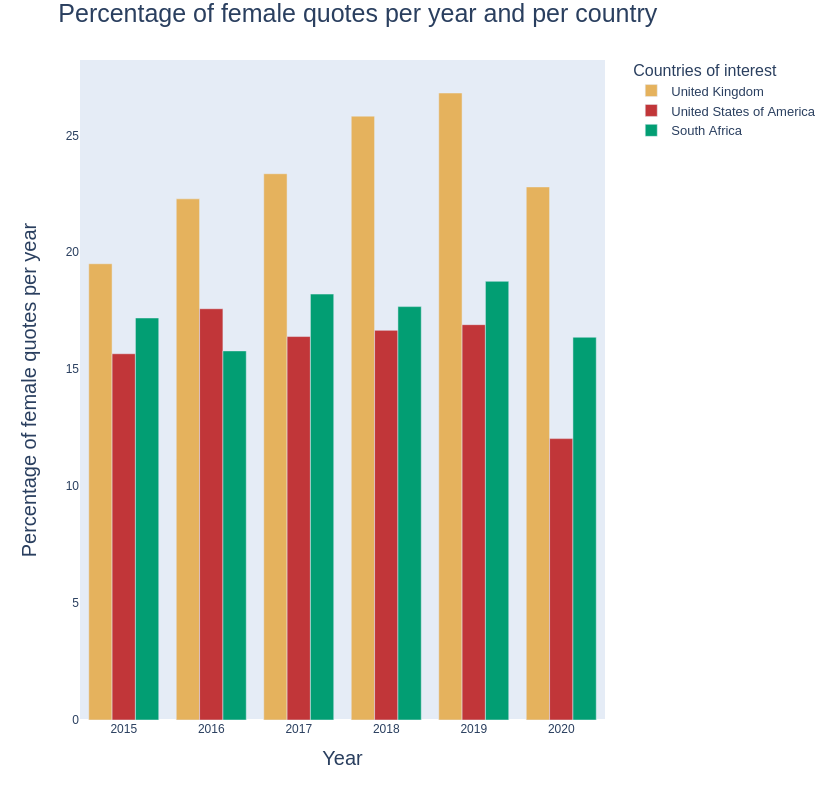

In [37]:
fig = px.bar(df_all_years_females ,x='year',y='Proportion', color = 'media_country', barmode="group",
             labels={"species": "countries of interest"},
             category_orders={"media_country": ["United Kingdom", "United States of America", "South Africa"]},
             color_discrete_sequence = palette_countries,
             width = 1000, height = 800)

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.update_layout(title=dict(
                            text="Percentage of female quotes per year and per country",
                            font_size=25,
                            yanchor="top",
                            y=0.995,
                            xanchor="left",
                            x=0.07),
                  yaxis = dict(
                           title='Percentage of female quotes per year',
                           titlefont_size=20),
                  xaxis = dict(
                           title='Year',
                           titlefont_size=20),
                  legend=dict(
                           title="Countries of interest",
                           orientation="v",
                           yanchor="bottom",
                           y=0.87,
                           xanchor="left",
                           x=1.05,
                           font_size = 13))
    
fig.show()
fig.write_html("images_website/evolution_years.html")

# Part 2 of the  data story

Welcome, glad you're curious for more ! 

#### This notebook aims at analysing the respected media and the most popular ones 

The list of most respected media is taken from the Top 10 Forbes: 

https://www.forbes.com/sites/berlinschoolofcreativeleadership/2017/02/01/10-journalism-brands-where-you-will-find-real-facts-rather-than-alternative-facts/?sh=1c18e04de9b5

The list of most popular/read media is taken from: https://www.similarweb.com/top-websites/category/news-and-media/

*Note*: We take 5 in order which appear in at least 3 years 

**Good to know**:
- Type of media represents the group of either respected or popular


In [9]:
# This boolean is used in order to not waste time running files that are already present 
RUN_PREPROCESSING = False

FILE2015 = DATA_PATH2015 + 'M3_df_2015_complete.pkl'
FILE2016 = DATA_PATH2016 + 'M3_df_2016_complete.pkl'
FILE2017 = DATA_PATH2017 + 'M3_df_2017_complete.pkl'
FILE2018 = DATA_PATH2018 + 'M3_df_2018_complete.pkl'
FILE2019 = DATA_PATH2019 + 'M3_df_2019_complete.pkl'
FILE2020 = DATA_PATH2020 + 'M3_df_2020_complete.pkl'

FILES = [FILE2015, FILE2016, FILE2017, FILE2018, FILE2019, FILE2020]

In [10]:
# The top 5 selected media 
top5_respected_media = ["nytimes", "washingtonpost", "bbc", "reuters", "politico"]
top5_popular_media = ["yahoo", "msn","bbc", "cnn", "nytimes"]

In [11]:

if RUN_PREPROCESSING:

    # For extracting respected media
    df_2015_respected_media = extract_media_interest(df_2015, DATA_PATH2015, FILE2015, top5_respected_media, respected = True)
    df_2016_respected_media = extract_media_interest(df_2016, DATA_PATH2016, FILE2016, top5_respected_media, respected = True)
    df_2017_respected_media = extract_media_interest(df_2017, DATA_PATH2017, FILE2017, top5_respected_media, respected = True)
    df_2018_respected_media = extract_media_interest(df_2018, DATA_PATH2018, FILE2018, top5_respected_media, respected = True)
    df_2019_respected_media = extract_media_interest(df_2019, DATA_PATH2019, FILE2019, top5_respected_media, respected = True)
    df_2020_respected_media = extract_media_interest(df_2020, DATA_PATH2020, FILE2020, top5_respected_media, respected = True)

    # For extracting popular media
    df_2015_popular_media = extract_media_interest(df_2015, DATA_PATH2015, FILE2015, top5_popular_media, respected = False)
    df_2016_popular_media = extract_media_interest(df_2016, DATA_PATH2016, FILE2016, top5_popular_media, respected = False)
    df_2017_popular_media = extract_media_interest(df_2017, DATA_PATH2017, FILE2017, top5_popular_media, respected = False)
    df_2018_popular_media = extract_media_interest(df_2018, DATA_PATH2018, FILE2018, top5_popular_media, respected = False)
    df_2019_popular_media = extract_media_interest(df_2019, DATA_PATH2019, FILE2019, top5_popular_media, respected = False)
    df_2020_popular_media = extract_media_interest(df_2020, DATA_PATH2020, FILE2020, top5_popular_media, respected = False)

In [16]:
# Respected media 
with open(DATA_PATH2015 + f'M3_df_{FILE2015[12:16]}_respected_media.pkl', 'rb') as input_file:
    df_2015_respected_media = pickle.load(input_file)
with open(DATA_PATH2016 + f'M3_df_{FILE2016[12:16]}_respected_media.pkl', 'rb') as input_file:
    df_2016_respected_media = pickle.load(input_file)
with open(DATA_PATH2017 + f'M3_df_{FILE2017[12:16]}_respected_media.pkl', 'rb') as input_file:
    df_2017_respected_media = pickle.load(input_file)
with open(DATA_PATH2018 + f'M3_df_{FILE2018[12:16]}_respected_media.pkl', 'rb') as input_file:
    df_2018_respected_media = pickle.load(input_file)
with open(DATA_PATH2019 + f'M3_df_{FILE2019[12:16]}_respected_media.pkl', 'rb') as input_file:
    df_2019_respected_media = pickle.load(input_file)
with open(DATA_PATH2020 + f'M3_df_{FILE2020[12:16]}_respected_media.pkl', 'rb') as input_file:
    df_2020_respected_media =  pickle.load(input_file)

In [17]:
# Popular media 
with open(DATA_PATH2015 + f'M3_df_{FILE2015[12:16]}_popular_media.pkl', 'rb') as input_file:
    df_2015_popular_media = pickle.load(input_file)
with open(DATA_PATH2016 + f'M3_df_{FILE2016[12:16]}_popular_media.pkl', 'rb') as input_file:
    df_2016_popular_media = pickle.load(input_file)
with open(DATA_PATH2017 + f'M3_df_{FILE2017[12:16]}_popular_media.pkl', 'rb') as input_file:
    df_2017_popular_media = pickle.load(input_file)
with open(DATA_PATH2018 + f'M3_df_{FILE2018[12:16]}_popular_media.pkl', 'rb') as input_file:
    df_2018_popular_media = pickle.load(input_file)
with open(DATA_PATH2019 + f'M3_df_{FILE2019[12:16]}_popular_media.pkl', 'rb') as input_file:
    df_2019_popular_media = pickle.load(input_file)
with open(DATA_PATH2020 + f'M3_df_{FILE2020[12:16]}_popular_media.pkl', 'rb') as input_file:
    df_2020_popular_media =  pickle.load(input_file)

In [18]:
# Make list of the respective medias to allow cleaner code

df_list_respect = [df_2015_respected_media, df_2016_respected_media, df_2017_respected_media, df_2018_respected_media, df_2019_respected_media,
                  df_2020_respected_media]

df_list_popular = [df_2015_popular_media, df_2016_popular_media, df_2017_popular_media, df_2018_popular_media, df_2019_popular_media,
                  df_2020_popular_media]

In [19]:
# This function is used in order to add some transparency to the colors 
white = [1, 1, 1]
alpha = 0.3
popular_color_alpha = make_rgb_transparent(popular_color, white, alpha)
respect_color_alpha = make_rgb_transparent(respect_color, white, alpha)
female_color_alpha = make_rgb_transparent(female_color, white, alpha -0.2)
male_color_alpha = make_rgb_transparent(male_color, white, alpha -0.2)

### Proportion of quotes depending on gender and type of media

Here we are looking at possible differences in terms of proportion of males/females being quoted depending on the type of media (popular or respected)

In [20]:
# Combine all years with the columns of interest
gender_all_years_extended_res = gender_all_years_extension(df_list_respect)
gender_all_years_extended_res["Respected"] = True

gender_all_years_extended_pop = gender_all_years_extension(df_list_popular)
gender_all_years_extended_pop["Respected"] = False


In [21]:
# Combine both the popular and the respected dataframe
df_pop_res_all = gender_all_years_extended_res.append(gender_all_years_extended_pop)

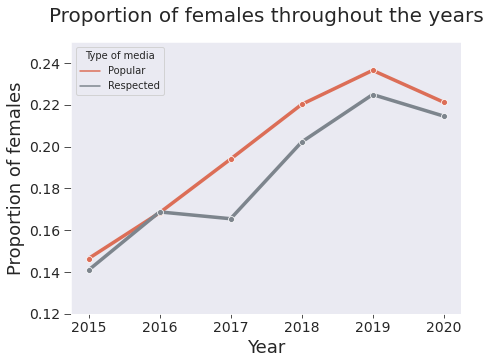

In [22]:
# Line plot
fig = plt.figure(figsize=(7,5))
labels = ["Popular", "Respected"]
g= sns.lineplot(data = df_pop_res_all.reset_index(), x = "year", y = "percentage_female", hue = "Respected" , marker = "o",palette=[popular_color,respect_color], linewidth = 3.5)
h, l = g.get_legend_handles_labels()
g.legend(h, labels, title="Type of media")
g.set(xlabel='Year', ylabel='Proportion of females')
plt.title("Proportion of females throughout the years", pad=20)
plt.grid(False)
plt.ylim([0.12,0.25])
plt.show(g)
fig.savefig('images_website/prop_type_media_females_lineplot.svg', format='svg', dpi=1200)

**Interpretation**
It seems that the proportion of women in both the respected and the popular media is increasing.

It is interesting to note that it tends to be higher for popular media than respected; we shall analyse this further

### Sitenames proportion and plot

The sitenames are the different media belonging to the two "types_of_media", the popular and the respected

The list of the respective media is given in cell #5

In [23]:

df_all_sites_respect = loop_all_sitenames_proportion(df_list_respect)
df_all_sites_popular = loop_all_sitenames_proportion(df_list_popular)
df_all_sites_respect["Type_of_media"] = "Respected"
df_all_sites_popular["Type_of_media"] = "Popular"

In [24]:
# Separate by gender
df_all_sites_male_res = df_all_sites_respect[df_all_sites_respect.gender == "Male"]
df_all_sites_male_pop = df_all_sites_popular[df_all_sites_popular.gender == "Male"]

df_all_sites_female_res = df_all_sites_respect[df_all_sites_respect.gender == "Female"]
df_all_sites_female_pop = df_all_sites_popular[df_all_sites_popular.gender == "Female"]

In [25]:
df_all_sites_female_combined = df_all_sites_female_res.append(df_all_sites_female_pop)

#### We make plot showing the percentage of female speakers in the different media 

In [ ]:
fig = plt.figure(figsize=(20,20))
fig  = px.line( x=df_all_sites_female_combined["Year"],
               y = df_all_sites_female_combined["Proportion"], 
               color = df_all_sites_female_combined["sitenames"], 
               markers='x',
               labels={
                     "color": "Media",
                     "y": "Percentage of females",
                     "x": "Year"
                   
                 },
               color_discrete_sequence = px.colors.qualitative.Safe,
               facet_col=df_all_sites_female_combined["Type_of_media"])
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.update_layout(title_text='Percentage of quotes from females based on the media', title_x=0.25)


In [ ]:
# Save plot for website
pio.write_html(fig, file='images_website/percentage_quotes_females_media.html', auto_open=False)

**Intepretation**

From this plot, we note that their is more disparity between the media within a same "type of media" (respected vs popular) than between the type of media.

## Proportion of quotes per age

In this part, we are looking to see at the distribution of age depending on the type of media and the gender of the quoted speaker

In [ ]:
# Access columns of interest
df_all_age_range_appended_popular = append_all_df(df_list_popular, columns = ["gender", "sitenames", "age_range"])
df_all_age_range_appended_respect = append_all_df(df_list_respect, columns = ["gender", "sitenames", "age_range"])

In [ ]:
# Make proportions for the distribution of age ranges
df_all_age_proportion_popular = create_df_age_proportion(df_all_age_range_appended_popular, threshold_tot = 1000)
df_all_age_proportion_respect = create_df_age_proportion(df_all_age_range_appended_respect, threshold_tot = 1000)

In [ ]:
# We separate by gender
df_all_age_proportion_popular_female = df_all_age_proportion_popular[df_all_age_proportion_popular["gender"] == "Female"]
df_all_age_proportion_popular_male = df_all_age_proportion_popular[df_all_age_proportion_popular["gender"] == "Male"]

In [ ]:
df_all_age_proportion_respect_female = df_all_age_proportion_respect[df_all_age_proportion_respect["gender"] == "Female"]
df_all_age_proportion_respect_male = df_all_age_proportion_respect[df_all_age_proportion_respect["gender"] == "Male"]

In [ ]:
df_all_age_proportion_respect_female["type_of_media"] = "Respected"
df_all_age_proportion_popular_female["type_of_media"] = "Popular"
df_all_age_proportion_respect_male["type_of_media"] = "Respected"
df_all_age_proportion_popular_male["type_of_media"] = "Popular"

In [ ]:
# Combining respected and popular for the genders
df_all_age_proportion_respect_combined_female = df_all_age_proportion_respect_female.append(df_all_age_proportion_popular_female)
df_all_age_proportion_respect_combined_male = df_all_age_proportion_respect_male.append(df_all_age_proportion_popular_male)

In [ ]:
f, axs = plt.subplots(2, 1, sharex=True, figsize = (16,10))



sns.pointplot(data=df_all_age_proportion_respect_combined_female, x='age_range',y='Proportion', hue = "type_of_media",ax=axs[0], palette=[respect_color, popular_color], alpha = 0.7,dodge=False)
sns.pointplot(data=df_all_age_proportion_respect_combined_male, x='age_range',y='Proportion',ax=axs[1],hue = "type_of_media",palette=[respect_color,popular_color], alpha = 0.7, dodge = False, legend = False)
plt.suptitle("Age distribution depending on type of media and gender", fontsize = 15)
axs[0].set_title('Females', pad = 20)
axs[1].set(xlabel='Age range', ylabel='Percentage of male quotes')
axs[0].set(xlabel='', ylabel='Percentage of female quotes')
axs[1].set_title('Males', pad = 20)

axs[0].tick_params(axis = 'x',labelrotation=45)
axs[1].tick_params(labelrotation=45)
axs[1].legend_.set_title("Type of media")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
axs[0].legend_.remove()
f.tight_layout()
f.savefig('images_website/age_distribution_combined_by_gender.svg', format='svg', dpi=1200)

**Interpretation**

Super interesting to see that the trend is a normal distribution for males in both the respected and the popular type of media. In the females, the trend is somehoe different.
For the respected media, the peak lies to the right of the males average and for the popular it lies to the left (that is younger females are more quoted in popular media)

While it may seem good that the proportion of females quoted is younger (it could indeed indicate that we are listening now more than before to females) the fact that it is only the fact popular might be discouraging. 


## Proportion of quotes depending on length of quotes

In this part we are looking to see whether the gender has an impact on the length of the quote for either popular and respected

In [ ]:
# Append all years with the columns of interest
df_popular_quote_length = append_all_df(df_list_popular, columns = ['gender','quotation_length', 'Year'], with_year = True)
df_respect_quote_length = append_all_df(df_list_respect, columns = ['gender','quotation_length', 'Year'], with_year = True)

In [ ]:
# Append all years with the columns of interest
stats_length_popular= CI_95_percent(df_popular_quote_length).reset_index()
stats_length_respect= CI_95_percent(df_respect_quote_length).reset_index()

In [ ]:
# Separate statistics by gender
stats_length_popular_female = stats_length_popular[stats_length_popular["gender"] == "Female"]
stats_length_popular_male = stats_length_popular[stats_length_popular["gender"] == "Male"]

stats_length_respect_female = stats_length_respect[stats_length_respect["gender"] == "Female"]
stats_length_respect_male = stats_length_respect[stats_length_respect["gender"] == "Male"]

In [ ]:
plt.figure(figsize = (12,8))
plt.title("Length of quotes for both type of medias with CI = 95%")
plt.plot(stats_length_popular_female.Year,stats_length_popular_female["mean"], marker='$\u2640$', label = "Female popular",linestyle='--', markersize=14, color = popular_color)
plt.fill_between(stats_length_popular_female["Year"], stats_length_popular_female["ci95_lo"],stats_length_popular_female["ci95_hi"], alpha = 0.2, color = popular_color)

plt.plot(stats_length_popular_male.Year,stats_length_popular_male["mean"],label = "Male popular",  linestyle='dotted',  marker='$\u2642$', markersize=14, color =popular_color)
plt.fill_between(stats_length_popular_male["Year"], stats_length_popular_male["ci95_lo"], stats_length_popular_male["ci95_hi"], alpha = 0.2, color =popular_color)
plt.plot(stats_length_respect_female.Year,stats_length_respect_female["mean"], label = "Female respected", marker='$\u2640$', linestyle='--', markersize=14, color = respect_color)
plt.fill_between(stats_length_respect_female["Year"], stats_length_respect_female["ci95_lo"], stats_length_respect_female["ci95_hi"], alpha = 0.2, color = respect_color)
plt.plot(stats_length_respect_male.Year,stats_length_respect_male["mean"],  linestyle='dotted', label = "Male respected",marker='$\u2642$', markersize=14, color =respect_color)
plt.fill_between(stats_length_respect_male["Year"], stats_length_respect_male["ci95_lo"], stats_length_respect_male["ci95_hi"], alpha = 0.2, color =respect_color)
plt.legend()
plt.ylabel("Mean length quote");
plt.ylabel("Mean length quote");
plt.savefig('images_website/length_quote_combined_with_sex_symbol.svg', format='svg', dpi=1200)

**Interpretation**

We note that for the respected media, women throughout the years have a lower mean of words compared to males. 

However, when looking at the popular media between 2016/2017, the quotes for females became longer than for males. We shall dig further into this.


### Look at the number of quotes per gender for each sitenames

The goal of this part is compare the number of quotes for each gender depending on the sitename (the media)

In [ ]:
# Takes 15 seconds to run
loop_media_gender(df_list_respect)

loop_media_gender(df_list_popular)

**Interpretation**

We do not find this plot brings any value to the study

### Dig into citizenship

In this part we want to look at the citizenship of each gender that are quoted for each type of media. 

It is important to note that the media we are seeing comes from english speaking countries (for the respected ones). 
We thus expect a bias for english speaking countries but are more interested in none english speaking  ones

In [ ]:
# Collect info interesting for citizenship
df_citizen_all_popular = append_all_df(df_list_popular, columns = ["gender", "speaker", "tags", "Year", "sitenames", "citizenship", "Continent"]).explode("tags")
df_citizen_all_respect = append_all_df(df_list_respect, columns = ["gender", "speaker", "tags", "Year", "sitenames", "citizenship", "Continent"]).explode("tags")

In [ ]:
# Drop rows where citizenship is unknown
df_citizen_popular = df_citizen_all_popular.dropna(subset = ['citizenship'])
df_citizen_respect = df_citizen_all_respect.dropna(subset = ['citizenship'])

print(f"The popular has {len(df_citizen_all_popular) - len(df_citizen_popular)} rows removed and the respected  {len(df_citizen_all_respect) - len(df_citizen_respect)} rows")

In [ ]:
# This list was made by hand in order to clean the data

df_list_code_words = ["america", "australia", "engl", "ireland", "netherlands", "italy", "india", "german", "japan", "portugal",
                      "france", "china", "brazil", "russia", "iran", "austria", "malaysia", "pakistan", "greece", "nigeria", "scotland",
                     "egypt", "romania", "lebanon", "wales", "bulgaria", "syria", "peru", "iraq", "hong", "congo",
                     "mongolia", "hungary", "libya", "Afghanistan", "Palestin", "Armeni"]
df_list_names = ["United States of America", "Australia", "United Kingdom", "United Kingdom", "Netherlands", "Italy", "India", "Germany",
                "Japan", "Portugal", "France", "China", "Brazil", "Russia", "Iran", "Portugal", "Malaysia", "Pakistan", "Greece",
                "Nigeria", "United Kingdom", "Egypt", "Romania", "Lebanon", "United Kingdom", "Bulgaria", "Syria", "Peru", "Iraq",
                "Hong Kong", "Congo", "Mongolia", "Hungary", "Libya", "Afghanistan", "Palestine, State of", "Armenia"]

In [ ]:
# Sanity check for equal length between the lists
print(len(df_list_code_words),len(df_list_names))

In [ ]:
# Careful this takes at least 2 min
# Replace the faulty names with real countries for homogeneity 
df_citizen_popular = clean_citizenship(df_citizen_popular, df_list_code_words, df_list_names)

df_citizen_respect = clean_citizenship(df_citizen_respect, df_list_code_words, df_list_names)

In [ ]:
# Now we need to filter out the countries which are not listed as current countries based on the dataset
# https://datahub.io/core/country-list#data
# Using only column A which stands for the name of the country 
country_list = pd.read_excel(DATA_PATH + "country_list.ods", engine="odf", usecols = "A")

We decided to keep only countries that are to date in the list. This is done in order to neglect periods such as the ying dynasty and others.

In [ ]:
# Keep df with citizenship belonging to the list of "current countries"

df_citizen_popular_clean = df_citizen_popular[df_citizen_popular['citizenship'].isin(country_list["Name"])]
df_citizen_respect_clean = df_citizen_respect[df_citizen_respect['citizenship'].isin(country_list["Name"])]

In [ ]:
print(f"We have {df_citizen_popular_clean.citizenship.nunique()} different countries for the popular media and {df_citizen_respect_clean.citizenship.nunique()} for the respected")

In [ ]:
df_citizen_proportion_popular = create_df_citizenship_proportion(df_citizen_popular_clean, with_year = True)
df_citizen_proportion_respect = create_df_citizenship_proportion(df_citizen_respect_clean, with_year = True)

In [ ]:
df_citizen_proportion_respect_females =df_citizen_proportion_respect[df_citizen_proportion_respect["gender"] == "Female"] 
df_citizen_proportion_popular_females =df_citizen_proportion_popular[df_citizen_proportion_popular["gender"] == "Female"] 

In [ ]:
fig_prop_respect = px.bar(
    data_frame=df_citizen_proportion_respect_females.sort_values(by = ["Year", "Proportion"], ascending = [True,False]), 
    y="citizenship", 
    x="Proportion", 
    animation_frame="Year", 
    hover_name="citizenship", 
    category_orders={'Year':list(range(2015,2020))},
     labels={
                     "Proportion": "Proportion of females",
                     "citizenship": "Citizenship"
                 },
    
    range_x =[0, 55],
                 width=900, height=1000
)

fig_prop_respect.add_vline(x=50, line_dash="dot")
fig_prop_respect.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1400
fig_prop_respect.update_layout(title_text='Proportion of female citizens quoted for respected media through the years', title_x=0.5,  plot_bgcolor=f'rgb{respect_color_alpha}', yaxis = dict(autorange="reversed"))

fig_prop_respect.show()
pio.write_html(fig_prop_respect, file='images_website/fig_prop_respected_female.html', auto_open=False)

In [ ]:
fig_prop_respect = px.bar(
    data_frame=df_citizen_proportion_popular_females.sort_values(by = ["Year", "Proportion"], ascending = [True,False]), 
    y="citizenship", 
    x="Proportion", 
    animation_frame="Year", 
    hover_name="citizenship", 
    category_orders={'Year':list(range(2015,2020))},
     labels={
                     "Proportion": "Proportion of females",
                     "citizenship": "Citizenship"
                 },
    
    range_x =[0, 100],
                 width=900, height=1000
)

fig_prop_respect.add_vline(x=50, line_dash="dot")
fig_prop_respect.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1400
fig_prop_respect.update_layout(title_text='Proportion of female citizens quoted for popular media through the years', title_x=0.5,  plot_bgcolor=f'rgb{popular_color_alpha}', yaxis = dict(autorange="reversed"))

fig_prop_respect.show()
pio.write_html(fig_prop_respect, file='images_website/fig_prop_popular_female.html', auto_open=False)

### Clearer plots

In order to better visuaize the plot, we use bar chart race, which enables horizontal movement of the countries 
We also limit the number of countries we plot by keeping only the ones which have values for years 2015-2019
Considering the fact that 2020 has little data and only 5 citizenships, we decided to not plot it --> It could mislead the reader into thinking that some countries went from high levels to low from 2019-2020


We are left with 15 citizenships

In [ ]:
df_citizen_respect_females_brc = df_citizen_proportion_respect_females[["citizenship", "Year", "Proportion"]]
df_citizen_popular_females_brc = df_citizen_proportion_popular_females[["citizenship", "Year", "Proportion"]]


In [ ]:
# The year must be made into time stamp according to docs
df_citizen_respect_females_brc.dtypes
df_citizen_respect_females_brc["Year"] = pd.to_datetime(df_citizen_respect_females_brc["Year"])
df_citizen_popular_females_brc["Year"] = pd.to_datetime(df_citizen_popular_females_brc["Year"])

In [ ]:
# Reformat dataframe according to docs
df_citizen_respect_females_brc = pd.pivot_table(df_citizen_respect_females_brc, index=["Year"], columns = ["citizenship"], values = ["Proportion"])

df_citizen_popular_females_brc = pd.pivot_table(df_citizen_popular_females_brc, index=["Year"], columns = ["citizenship"], values = ["Proportion"])

In [ ]:
# Remove index name
df_citizen_respect_females_brc.index.name = None
df_citizen_respect_females_brc.columns = [col[1] for col in df_citizen_respect_females_brc.columns]
df_citizen_popular_females_brc.index.name = None
df_citizen_popular_females_brc.columns = [col[1] for col in df_citizen_popular_females_brc.columns]

In [ ]:
col_before_nan_filter_respect = len(df_citizen_respect_females_brc.columns)
col_before_nan_filter_popular = len(df_citizen_popular_females_brc.columns)

Note: Here we still have 2020

In [ ]:
# we only keep countries where the number of nans is at  most one. 
# This means that we have at least 5 years of data --> 2020 has little data which explains the choice of being lenient on the last year

df_citizen_respect_females_brc = df_citizen_respect_females_brc[df_citizen_respect_females_brc.columns[df_citizen_respect_females_brc.isnull().sum() < 2]]
df_citizen_popular_females_brc = df_citizen_popular_females_brc[df_citizen_popular_females_brc.columns[df_citizen_popular_females_brc.isnull().sum() < 2]]

In [ ]:
print(f"We removed {col_before_nan_filter_respect - len(df_citizen_respect_females_brc.columns)} citizenships for respected media")
print(f"We removed {col_before_nan_filter_popular - len(df_citizen_popular_females_brc.columns)} citizenships for popular media")

In [ ]:
# Fill Nan with zeros
df_citizen_respect_females_brc = df_citizen_respect_females_brc.fillna(0)
df_citizen_respect_females_brc.head(2)

In [ ]:

bcr.bar_chart_race(title = "Proportion of female speakers for respected media",df=df_citizen_respect_females_brc, period_fmt='%Y',n_bars=15,filename=None,steps_per_period = 50, figsize = (5,3),period_length=2000,fixed_max=True,bar_kwargs={'alpha': .7}, title_size = 12)

In [ ]:

bcr.bar_chart_race(title = "Proportion of female speakers for Popular media",df=df_citizen_popular_females_brc, period_fmt='%Y',n_bars=15,filename=None,steps_per_period = 50, figsize = (5,3),period_length=2000,fixed_max=True,bar_kwargs={'alpha': .7}, title_size = 12)

In [ ]:
# Because of its few data, 2020 is misleading as is removed
df_citizen_respect_females_brc_without2020 = df_citizen_respect_females_brc.drop(df_citizen_respect_females_brc.index[-1])
df_citizen_popular_females_brc_without2020 = df_citizen_popular_females_brc.drop(df_citizen_respect_females_brc.index[-1])


In [ ]:
bcr.bar_chart_race(title = "Proportion of female speakers for respected media without 2020", df=df_citizen_respect_females_brc_without2020, period_fmt='%Y',n_bars=15,filename=None,steps_per_period = 50, figsize = (6,4),period_length=2400,fixed_max=50,bar_kwargs={'alpha': .7}, perpendicular_bar_func='median',cmap='dark24', title_size = 12)

In [ ]:
bcr.bar_chart_race(title = "Proportion of female speakers for popular media without 2020", df=df_citizen_popular_females_brc_without2020, period_fmt='%Y',n_bars=15,filename=None,steps_per_period = 40, figsize = (6,4),period_length=2800,fixed_max=True,bar_kwargs={'alpha': .7}, perpendicular_bar_func='median',cmap='dark24', title_size = 12)

In [ ]:
# This is code to use if one wants to safe the html 
"""
data_html = html.data
Html_file= open("bar_char_race_female_respected.html","w")
Html_file.write(data_html)
Html_file.close()
"""

# Dig into categories
## Proportion of quotes per category

In [ ]:
# Take 30-40 seconds to run
df_category_all_popular = loop_all_categories_proportion(df_list_popular)
df_category_all_respected = loop_all_categories_proportion(df_list_respect)

In [ ]:
df_category_all_popular["Type_of_media"] = "Popular"
df_category_all_respected["Type_of_media"] = "Respected"

In [ ]:
df_category_female_all_combined = df_category_all_popular[df_category_all_popular["gender"] == "Female"].append(df_category_all_respected[df_category_all_respected["gender"] == "Female"])

In [ ]:
fig  = px.line(df_category_female_all_combined, x="Year",
               y ="Proportion", 
               color = "tags", 
               markers='x',
               labels={
                     "color": "Categories",
                     "y": "Percentage of females",
                     "x": "Year",
                   "tags" : "Categories"
                   
                 },
              
               color_discrete_sequence = palette_cat,
               facet_col=df_category_female_all_combined["Type_of_media"],
               category_orders={ "Type_of_media": ["Respected", "Popular"]})
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.update_layout(title_text='Percentage of quotes from females based on category and type of media', title_x=0.2)

**Interpretation**

In this plot we note that in both respected and popular media, the percentage of women quoted in the least in sports, buisiness, science and politics.
This is not surprising and even though we have a long way to go, it seems to be slightly increasing through the years


In the respected media the categories with the highest percentage of females quoted is in culture and entertainment; it is however still below the bar of 50%. As for the popular the tendency is the same for all categories but entertainment which in 2018 had more females quotes than male.

Let us dig further into this

In [ ]:
# Save the html
pio.write_html(fig, file='images_website/percentage_quotes_females_category.html', auto_open=False)

#### We also tried plotting with an interactive tree map

In [ ]:

df_category_all_combined = df_category_all_popular.append(df_category_all_respected)

In [ ]:


fig = px.treemap(df_category_all_combined, path=["gender", "tags","Year", "Type_of_media"], 
                 values='Proportion')
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25),width=800,
    height=1000)

fig.show()

### Let's dig deeper: 

The only time and topic where more females were quoted than males (proportionally) was in 2018 for the category of enteirtainment 


In [ ]:
df_2018_popular_media_tags_exploded = df_2018_popular_media.explode("tags")
df_2018_entertainment_popular = df_2018_popular_media_tags_exploded[df_2018_popular_media_tags_exploded["tags"] == "entertainment"]

In [ ]:
df_2018_respect_media_tags_exploded = df_2018_respected_media.explode("tags")
df_2018_culture_respect = df_2018_respect_media_tags_exploded[df_2018_respect_media_tags_exploded["tags"] == "culture"]

In [ ]:
# Sanity check
df_2018_entertainment_popular["gender"].value_counts()

# We do have indeed more female occurences than males

In [ ]:
# Separate the dataframe by gender
df_2018_entertainment_popular_female = df_2018_entertainment_popular[df_2018_entertainment_popular["gender"] == "Female"]
df_2018_entertainment_popular_male = df_2018_entertainment_popular[df_2018_entertainment_popular["gender"] == "Male"]

df_2018_culture_respect_female = df_2018_culture_respect[df_2018_culture_respect["gender"] == "Female"]
df_2018_culture_respect_male = df_2018_culture_respect[df_2018_culture_respect["gender"] == "Male"]

In [ ]:
# Count the number of unique female speakers
print(f" We find {df_2018_entertainment_popular_female.speaker.nunique()} unique female speakers and {df_2018_entertainment_popular_male.speaker.nunique()} unique men for popular media with entairtenainment in 2018")
print(f" We find {df_2018_culture_respect_female.speaker.nunique()} unique female speakers and {df_2018_culture_respect_male.speaker.nunique()} unique men for respect media with culture theme in 2018")

**Intepretation**

It is interesting to note that even though the number of quotes is higher, the number of speakers for females is much smaller than that of men. 

In [ ]:
# Top 3 female speakers in entairtnement in terms of number quotes
df_2018_entertainment_popular_female[["speaker", "qids"]].value_counts()[:3]

In [ ]:
top_female_speaker_2018_entertainement_qid = df_2018_entertainment_popular_female[["speaker", "qids"]].value_counts()[:1].index.get_level_values('qids').to_list()

In [ ]:
# Top 3 male speakers in entairtnement in terms of number quotes
df_2018_entertainment_popular_male[["speaker", "qids"]].value_counts()[:3]

In [ ]:

top_male_speaker_2018_entertainement_qid = df_2018_entertainment_popular_male[["speaker", "qids"]].value_counts()[:1].index.get_level_values('qids').to_list()

In [ ]:
top_female_speaker_2018_culture_qid = df_2018_culture_respect_female[["speaker", "qids"]].value_counts()[:1].index.get_level_values('qids').to_list()
df_2018_culture_respect_female[["speaker", "qids"]].value_counts()[:3]

In [ ]:
top_male_speaker_2018_culture_qid = df_2018_culture_respect_male[["speaker", "qids"]].value_counts()[:1].index.get_level_values('qids').to_list()
df_2018_culture_respect_male[["speaker", "qids"]].value_counts()[:3]

In [ ]:
# Fetch the most cited quote from the top female, top male for entairtanement and culture 2018
quote_entertain_2018_male = df_2018_entertainment_popular_male[df_2018_entertainment_popular_male["qids"] == top_male_speaker_2018_entertainement_qid[0]].groupby(["quoteID", "quotation"]).count().index.get_level_values("quotation")[0]
quote_entertain_2018_female = df_2018_entertainment_popular_female[df_2018_entertainment_popular_female["qids"] == top_female_speaker_2018_entertainement_qid[0]].groupby(["quoteID", "quotation"]).count().index.get_level_values("quotation")[0]

quote_culture_2018_female = df_2018_culture_respect_female[df_2018_culture_respect_female["qids"] == top_female_speaker_2018_culture_qid[0]].groupby(["quoteID", "quotation"]).count().index.get_level_values("quotation")[0]
quote_culture_2018_male = df_2018_culture_respect_male[df_2018_culture_respect_male["qids"] == top_male_speaker_2018_culture_qid[0]].groupby(["quoteID", "quotation"]).count().index.get_level_values("quotation")[0]

## Let us dig again, instead of number of quotes, we may look at the unique number of speakers 

Indeed, we may have a higher proportion of quotes from a certain gender but it may be just a handful of people from that gender we deem important.
It is also interesting to see the spread of females/males that are quoted

In [ ]:
# Takes 30 seconds
df_speakers_all_popular = append_all_df(df_list_popular, columns = ["gender", "speaker", "tags", "age_range", "Year", "sitenames"]).explode("tags")
df_speakers_all_respect = append_all_df(df_list_respect, columns = ["gender", "speaker", "tags", "age_range", "Year", "sitenames"]).explode("tags")

In [ ]:
df_nunique_popular = df_speakers_all_popular.groupby("gender").speaker.nunique()
df_nunique_respect = df_speakers_all_respect.groupby("gender").speaker.nunique()

In [ ]:

print(f"For the popular media we find {df_nunique_popular.Male} unique male speakers and {df_nunique_popular.Female} female speakers")
print(f"This represents {df_nunique_popular.Female/(df_nunique_popular.Male + df_nunique_popular.Female)*100} percent of female speaker")

print(f"For the respected media we find {df_nunique_respect.Male} unique male speakers and {df_nunique_respect.Female} female speakers")
print(f"This represents {df_nunique_respect.Female/(df_nunique_respect.Male + df_nunique_respect.Female)*100} percent of female speaker")

In [ ]:
df_tags_nunique_respect = df_speakers_all_respect.groupby(["tags", "gender"]).speaker.nunique().to_frame(name = "unique_speaker_per_tag").reset_index()
df_tags_nunique_popular = df_speakers_all_popular.groupby(["tags", "gender"]).speaker.nunique().to_frame(name = "unique_speaker_per_tag").reset_index()

In [ ]:
plt.figure(figsize = (11,6))
plt.title("Number of unique speakers for respected media for all years combined")
ax = sns.barplot(data = df_tags_nunique_respect, x = "tags", y = "unique_speaker_per_tag", hue = "gender")
ax.set(xlabel='Tags', ylabel='Number of unique speakers')
ax.tick_params(axis = 'x',labelrotation=45)

In [ ]:
plt.figure(figsize = (11,6))
plt.title("Number of unique speakers for popular media for all years combined")
ax = sns.barplot(data = df_tags_nunique_popular, x = "tags", y = "unique_speaker_per_tag", hue = "gender")
ax.set(xlabel='Tags', ylabel='Number of unique speakers')
ax.tick_params(axis = 'x',labelrotation=45)

In [ ]:
# Compute the number of males speaking as one female is speaking for the respected/popular media
df_tags_nunique_respect_males_for_female = males_for_female_factor(df_tags_nunique_respect, "Respected")
df_tags_nunique_popular_males_for_female = males_for_female_factor(df_tags_nunique_popular, "Popular")



In [ ]:
# Append the popular and the respected media with the factors for each category/tag
df_tags_nunique_males_for_female = df_tags_nunique_respect_males_for_female.append(df_tags_nunique_popular_males_for_female)

In [ ]:

fig = px.bar(df_tags_nunique_males_for_female.sort_values(by = ["Factor"], ascending =False), x="tags", y="Factor", color="type_of_media"
            ,labels={
                     "type_of_media": "Type of media",
                     "y": "Percentage of females",
                     "Factor": "Number of males",
                   "tags" : "Categories"
                   
                 },
              
               color_discrete_sequence = palette_media
            
             ,barmode='group')
fig.update_layout(title_text='Number of males quoted for a single female depending on categories', title_x=0.25)
fig.show()


In [ ]:

pio.write_html(fig, file='images_website/factor_male_for_female_interactive.html', auto_open=False)

In [ ]:
# Append all years with the columns of interest
df_popular_quote_length_tags = append_all_df(df_list_popular, columns = ['gender', 'tags', 'quotation_length', 'Year'], with_year = True)
df_respect_quote_length_tags = append_all_df(df_list_respect, columns = ['gender','tags', 'quotation_length', 'Year'], with_year = True)


### Once again, let us look the quotation length but only for culture and entertainment

In [ ]:
df_popular_entertainment = df_popular_quote_length_tags.explode("tags")[df_popular_quote_length_tags.explode("tags").tags ==  "entertainment"]

df_respect_culture = df_respect_quote_length_tags.explode("tags")[df_respect_quote_length_tags.explode("tags").tags ==  "culture"]

In [ ]:
stats_length_popular_entertainment = CI_95_percent(df_popular_entertainment.drop(columns ="tags")).reset_index()
stats_length_respect_culture = CI_95_percent(df_respect_culture.drop(columns ="tags")).reset_index()

In [ ]:
# Separate statistics by gender
stats_length_popular_entertainment_female = stats_length_popular_entertainment[stats_length_popular_entertainment["gender"] == "Female"]
stats_length_popular_entertainment_male = stats_length_popular_entertainment[stats_length_popular_entertainment["gender"] == "Male"]

stats_length_respect_culture_female = stats_length_respect_culture[stats_length_respect_culture["gender"] == "Female"]
stats_length_respect_culture_male = stats_length_respect_culture[stats_length_respect_culture["gender"] == "Male"]

In [ ]:
plt.figure(figsize = (10,7))
plt.title("Average length of quotes for the year 2018 in culture and entertainment with CI = 95%", pad = 20)
plt.plot(stats_length_popular_entertainment_female.Year,stats_length_popular_entertainment_female["mean"], marker='$\u2640$', label = "Female popular (entertainment)",linestyle='--', markersize=14, color = popular_color)
plt.fill_between(stats_length_popular_entertainment_female["Year"], stats_length_popular_entertainment_female["ci95_lo"],stats_length_popular_entertainment_female["ci95_hi"], alpha = 0.2, color = popular_color)

plt.plot(stats_length_popular_entertainment_male.Year,stats_length_popular_entertainment_male["mean"],label = "Male popular (entertainment)",  linestyle='dotted',  marker='$\u2642$', markersize=14, color =popular_color)
plt.fill_between(stats_length_popular_entertainment_male["Year"], stats_length_popular_entertainment_male["ci95_lo"], stats_length_popular_entertainment_male["ci95_hi"], alpha = 0.2, color =popular_color)
plt.plot(stats_length_respect_culture_female.Year,stats_length_respect_culture_female["mean"], label = "Female respected (culture)", marker='$\u2640$', linestyle='--', markersize=14, color = respect_color)
plt.fill_between(stats_length_respect_culture_female["Year"], stats_length_respect_culture_female["ci95_lo"], stats_length_respect_culture_female["ci95_hi"], alpha = 0.2, color = respect_color)
plt.plot(stats_length_respect_culture_male.Year,stats_length_respect_culture_male["mean"],  linestyle='dotted', label = "Male respected (culture)",marker='$\u2642$', markersize=14, color =respect_color)
plt.fill_between(stats_length_respect_culture_male["Year"], stats_length_respect_culture_male["ci95_lo"], stats_length_respect_culture_male["ci95_hi"], alpha = 0.2, color =respect_color)
plt.legend()
plt.ylabel("Mean Quote Length");
plt.grid(False)
plt.tight_layout()
plt.savefig('images_website/length_quote_combined_with_sex_symbol_culture_entairtainment.svg', format='svg', dpi=1200)

## Let us look in proportions  instead of absolute



In [ ]:
df_proportion_category_popular = df_proportion_category_unique_speaker(df_tags_nunique_popular)
df_proportion_category_respect = df_proportion_category_unique_speaker(df_tags_nunique_respect)

In [ ]:
plt.figure(figsize = (11,6))
plt.title("Proportion of unique speakers for popular media for all years combined")
ax = sns.barplot(data = df_proportion_category_popular, x = "tags", y = "Proportion", hue = "gender")
ax.set(xlabel='Tags', ylabel='Proportion of unique speakers')
ax.tick_params(axis = 'x',labelrotation=45)

In [ ]:
plt.figure(figsize = (11,6))
plt.title("Proportion of unique speakers for respected media for all years combined")
ax = sns.barplot(data = df_proportion_category_respect, x = "tags", y = "Proportion", hue = "gender")
ax.set(xlabel='Tags', ylabel='Proportion of unique speakers')
ax.tick_params(axis = 'x',labelrotation=45)

## This is quite interesting, let us see if we find a trend throughout the years

In [ ]:
df_nunique_popular_years = df_speakers_all_popular.groupby(["tags", "gender", "Year"]).speaker.nunique().to_frame(name = "unique_speaker_per_tag").reset_index()
df_nunique_respect_years = df_speakers_all_respect.groupby(["tags", "gender", "Year"]).speaker.nunique().to_frame(name = "unique_speaker_per_tag").reset_index()

In [ ]:
df_nunique_popular_years["Type_of_media"] = "Popular"
df_nunique_respect_years["Type_of_media"] = "Respect"

In [ ]:
df_prop_popular_category = df_proportion_category_unique_speaker(df_nunique_popular_years, with_year = True)
df_prop_respect_category = df_proportion_category_unique_speaker(df_nunique_respect_years, with_year = True)

In [ ]:
df_nunique_category_all_combined = df_nunique_popular_years.append(df_nunique_respect_years)

In [ ]:
figure = px.bar(
    data_frame=df_nunique_popular_years, 
    x="tags", 
    y="unique_speaker_per_tag", 
    color = "gender",
    color_discrete_map={
        'Female': f'rgb{female_color}',
        'Male': f'rgb{male_color}'
    },
    animation_frame="Year", 
    hover_name="tags", 
    barmode='group',
    category_orders={'Year':list(range(2015,2020))},
     labels={
                     "unique_speaker_per_tag": "Number of unique speakers",
                     "gender": "Gender",
                     "tags": "Categories"
                 },
    
    range_y =[0, 30000],
                 width=800, height=500
)
figure.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1500
figure.update_layout(title_text='Number of unique speakers for popular media through the years', title_x=0.5, plot_bgcolor=f'rgb{popular_color_alpha}')

figure.show()

In [ ]:
fig_number_respected = px.bar(
    data_frame=df_nunique_respect_years, 
    x="tags", 
    y="unique_speaker_per_tag", 
    color = "gender",
    color_discrete_map={
        'Female': f'rgb{female_color}',
        'Male': f'rgb{male_color}'
    },
    animation_frame="Year", 
    hover_name="tags", 
    barmode='group',
    category_orders={'Year':list(range(2015,2020))},
     labels={
                     "unique_speaker_per_tag": "Number of unique speakers",
                     "gender": "Gender",
                     "tags": "Categories"
                 },
    
    range_y =[0, 14000],
                 width=800, height=500
)
fig_number_respected.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1500
fig_number_respected.update_layout(title_text='Number of unique speakers for respected media through the years', title_x=0.5,  plot_bgcolor=f'rgb{respect_color_alpha}')

fig_number_respected.show()

### Here again we will give the results when looking  at proportions

In [ ]:
fig_prop_popular = px.bar(
    data_frame=df_prop_popular_category, 
    x="tags", 
    y="Proportion", 
    color = "gender",
    color_discrete_map={
        'Female': f'rgb{(colors_palette[0])}',
        'Male': f'rgb{(colors_palette[1])}'
    },
    animation_frame="Year", 
    hover_name="tags", 
    barmode='group',
    category_orders={'Year':list(range(2015,2020))},
     labels={
                     "Proportion": "Proportion of unique speakers",
                     "gender": "Gender",
                     "tags": "Categories"
                 },
    
    range_y =[0, 100],
                 width=800, height=500
)
fig_prop_popular.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1500
fig_prop_popular.update_layout(title_text='Proportion of unique speakers for popular media through the years', title_x=0.5, plot_bgcolor=f'rgb{popular_color_alpha}')

fig_prop_popular.show()
pio.write_html(fig_prop_popular, file='images_website/fig_prop_unique_male_female_popular.html', auto_open=False)

In [ ]:
fig_prop_respect = px.bar(
    data_frame=df_prop_respect_category, 
    x="tags", 
    y="Proportion", 
    color = "gender",
    color_discrete_sequence = [f"rgb{colors_palette[0]}",f"rgb{colors_palette[1]}"],
    animation_frame="Year", 
    hover_name="tags", 
    barmode='group',
    category_orders={'Year':list(range(2015,2020))},
     labels={
                     "Proportion": "Proportion of unique speakers",
                     "gender": "Gender",
                     "tags": "Categories"
                 },
    
    range_y =[0, 100],
                 width=800, height=500
)
fig_prop_respect.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1500
fig_prop_respect.update_layout(title_text='Proportion of unique speakers for respected media through the years', title_x=0.5,  plot_bgcolor=f'rgb{respect_color_alpha}')

fig_prop_respect.show()
pio.write_html(fig_prop_respect, file='images_website/fig_prop_unique_male_female_respect.html', auto_open=False)

In [ ]:
color_discrete_sequence={
        'Female': f'rgb{(colors_palette[0])}',
        'Male': f'rgb{(colors_palette[1])}'
    }

In [ ]:
df_prop_popular_category_female = df_prop_popular_category[df_prop_popular_category["gender"] == "Female"]
df_prop_respect_category_female = df_prop_respect_category[df_prop_respect_category["gender"] == "Female"]

In [ ]:
df_prop_category_female_combined = df_prop_respect_category_female.append(df_prop_popular_category_female)

In [ ]:
df_prop_female_combined = px.bar(
    data_frame=df_prop_category_female_combined, 
    x="tags", 
    y="Proportion", 
    color = "Type_of_media",
    color_discrete_map={
        'Popular': f'rgb{popular_color}',
        'Respect': f'rgb{respect_color}'
    },
    animation_frame="Year", 
    hover_name="tags", 
    barmode='group',
    category_orders={'Year':list(range(2015,2020))},
     labels={
                     "Proportion": "Percentage of unique female speakers",
                     "gender": "Gender",
                     "tags": "Categories"
                 },
    
    range_y =[0, 40],
                 width=800, height=500
)
df_prop_female_combined.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1500
#(colors_palette[0])
df_prop_female_combined.update_layout(title_text='Percentage of unique female speakers depending on type of media', title_x=0.5,plot_bgcolor=f'rgb{female_color_alpha}')

df_prop_female_combined.show()
pio.write_html(df_prop_female_combined, file='images_website/fig_prop_unique_female_combine.html', auto_open=False)

### Let us take a look at the citizenship again but this time with the number of unique speakers

In [ ]:
df_nunique_popular_years_citizen = df_citizen_popular_clean.groupby(["citizenship", "gender", "Year"]).speaker.nunique().to_frame(name = "unique_speaker_per_citiz").reset_index()
df_nunique_respect_years_citizen = df_citizen_respect_clean.groupby(["citizenship", "gender", "Year"]).speaker.nunique().to_frame(name = "unique_speaker_per_citiz").reset_index()

In [ ]:
figure = px.bar(
    data_frame=df_nunique_popular_years_citizen.sort_values(by = ["Year", "citizenship"], ascending = [True,False]), 
    x="unique_speaker_per_citiz",
    y="citizenship", 
     
    color = "gender",
    animation_frame="Year", 
    hover_name="citizenship", 
    barmode='group',
    category_orders={'Year':list(range(2015,2020))},
     labels={
                     "unique_speaker_per_tag": "Number of unique speakers",
                     "gender": "Gender",
                     "tags": "Categories"
                 },
    
    
                 width=900, height=1000
)
figure.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1500
figure.update_layout(title_text='Number of unique speakers for popular media through the years', title_x=0.5, plot_bgcolor=f'rgb{popular_color_alpha}')

figure.show()

### Let us now do with proportions for the unique speakers and not absolute numbers 

In [ ]:
df_proportion_citizen_popular_nunique = df_proportion_citiz_unique_speaker(df_nunique_popular_years_citizen, with_year = True)
df_proportion_citizen_respect_nunique = df_proportion_citiz_unique_speaker(df_nunique_respect_years_citizen, with_year = True)

In [ ]:
fig_prop_respect = px.bar(
    data_frame=df_proportion_citizen_respect_nunique.sort_values(by = ["Year", "citizenship"], ascending = [True,False]), 
    y="citizenship", 
    x="Proportion", 
    color = "gender",
    animation_frame="Year", 
    hover_name="citizenship", 
    barmode="group",
    category_orders={'Year':list(range(2015,2020))},
     labels={
                     "Proportion": "Proportion of citizens",
                     "tags": "Categories"
                 },
    
    
                 width=900, height=1800
)
fig_prop_respect.add_vline(x=50, line_dash="dot")
fig_prop_respect.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1200
fig_prop_respect.update_layout(title_text='Proportion of female citizens quoted for respected media through the years', title_x=0.5,  plot_bgcolor=f'rgb{respect_color_alpha}')

fig_prop_respect.show()

### This graph is not clear, let us do with the proportion of unique speakers and not just proportion of quotes

Here we will for each citizenship and year analyse the proportion of female vs male speakers

In [ ]:
# df_proportion_citizen_respect_nunique

df_prop_citiz_popular_unique = df_proportion_citiz_unique_speaker_gender(df_nunique_popular_years_citizen, with_year = True)
df_prop_citiz_respect_unique = df_proportion_citiz_unique_speaker_gender(df_nunique_respect_years_citizen, with_year = True)

In [ ]:
df_proportion_citizen_respect_nunique_female = df_prop_citiz_respect_unique[df_prop_citiz_respect_unique.gender == "Female"]
df_proportion_citizen_popular_nunique_female = df_prop_citiz_popular_unique[df_prop_citiz_popular_unique.gender == "Female"]


In [ ]:
df_citizen_nunique_respect_females_brc = df_proportion_citizen_respect_nunique_female[["citizenship", "Year", "Proportion"]]
df_citizen_nunique_popular_females_brc = df_proportion_citizen_popular_nunique_female[["citizenship", "Year", "Proportion"]]


In [ ]:
# The year must be made into time stamp according to docs
df_citizen_nunique_respect_females_brc.dtypes
df_citizen_nunique_respect_females_brc["Year"] = pd.to_datetime(df_citizen_nunique_respect_females_brc["Year"])
df_citizen_nunique_popular_females_brc["Year"] = pd.to_datetime(df_citizen_nunique_popular_females_brc["Year"])

In [ ]:
df_citizen_nunique_respect_females_brc = pd.pivot_table(df_citizen_nunique_respect_females_brc, index=["Year"], columns = ["citizenship"], values = ["Proportion"])

df_citizen_nunique_popular_females_brc = pd.pivot_table(df_citizen_nunique_popular_females_brc, index=["Year"], columns = ["citizenship"], values = ["Proportion"])

In [ ]:
# Remove 2020
df_citizen_nunique_popular_females_brc = df_citizen_nunique_popular_females_brc.drop(index = df_citizen_nunique_popular_females_brc.index[-1])
df_citizen_nunique_respect_females_brc = df_citizen_nunique_respect_females_brc.drop(index = df_citizen_nunique_respect_females_brc.index[-1])

In [ ]:
# remove index name
df_citizen_nunique_respect_females_brc.index.name = None
df_citizen_nunique_respect_females_brc.columns = [col[1] for col in df_citizen_nunique_respect_females_brc.columns]
df_citizen_nunique_popular_females_brc.index.name = None
df_citizen_nunique_popular_females_brc.columns = [col[1] for col in df_citizen_nunique_popular_females_brc.columns]

In [ ]:
col_before_nan_filter_respect = len(df_citizen_nunique_respect_females_brc.columns)
col_before_nan_filter_popular = len(df_citizen_nunique_popular_females_brc.columns)

In [ ]:
# We removed 2020, and we only keep citizenships with all years available

df_citizen_nunique_respect_females_brc = df_citizen_nunique_respect_females_brc[df_citizen_nunique_respect_females_brc.columns[df_citizen_nunique_respect_females_brc.isnull().sum() < 1]]
df_citizen_nunique_popular_females_brc = df_citizen_nunique_popular_females_brc[df_citizen_nunique_popular_females_brc.columns[df_citizen_nunique_popular_females_brc.isnull().sum() < 1]]

In [ ]:
print(f"We removed {col_before_nan_filter_respect - len(df_citizen_nunique_respect_females_brc.columns)} citizenships for respected media")
print(f"We removed {col_before_nan_filter_popular - len(df_citizen_nunique_popular_females_brc.columns)} citizenships for popular media")

In [ ]:

bcr.bar_chart_race(title = "Proportion of unique female speakers for respected media",df=df_citizen_nunique_respect_females_brc, period_fmt='%Y',n_bars=15,filename=None,steps_per_period = 40, figsize = (5,3),period_length=2800,fixed_max=True,bar_kwargs={'alpha': .7}, title_size = 12)

In [ ]:
bcr.bar_chart_race(title = "Proportion of unique female speakers for popular media",df=df_citizen_nunique_popular_females_brc, period_fmt='%Y',n_bars=15,filename=None,steps_per_period = 40, figsize = (5,3),period_length=2800,fixed_max=True,bar_kwargs={'alpha': .7}, title_size = 12)

### Looking at entertainment and culture again let us now analyse the evolution of site names and female proportion over the year

In [ ]:
df_sitenames_enter_culture_popular = df_speakers_all_popular[((df_speakers_all_popular.tags == "entertainment") + (df_speakers_all_popular.tags == "culture"))]
df_sitenames_enter_culture_respect = df_speakers_all_respect[((df_speakers_all_respect.tags == "entertainment") + (df_speakers_all_respect.tags == "culture"))]

In [ ]:

df_sitenames_enter_culture_popular_prop = create_df_sitename_category_proportion(df_sitenames_enter_culture_popular, with_year = True)
df_sitenames_enter_culture_respect_prop = create_df_sitename_category_proportion(df_sitenames_enter_culture_respect, with_year = True)

In [ ]:
df_sitenames_enter_culture_popular_prop["Type_of_media"] = "Popular"
df_sitenames_enter_culture_respect_prop["Type_of_media"] = "Respected"

In [ ]:
df_sitenames_enter_culture_combined = df_sitenames_enter_culture_popular_prop.append(df_sitenames_enter_culture_respect_prop)

In [ ]:
df_sitenames_enter_culture_combined_female = df_sitenames_enter_culture_combined[df_sitenames_enter_culture_combined.gender == "Female"]

In [ ]:
df_culture = df_sitenames_enter_culture_combined_female[df_sitenames_enter_culture_combined_female.tags == "culture"]
df_entertain = df_sitenames_enter_culture_combined_female[df_sitenames_enter_culture_combined_female.tags == "entertainment"]

In [ ]:
fig  = px.line(df_culture.sort_values(by = ["Type_of_media", "Year"]),
               x="Year",
               y = "Proportion", 
               color = "sitenames", 
               markers='x',
               labels={
                     "Proportion": "Percentage of females",
                     "sitenames": "Name of site",
                     "x": "Year"
                   
                 },
               color_discrete_sequence = px.colors.qualitative.Safe,
               facet_col="Type_of_media")
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.update_layout(title_text='Percentage of quotes from females for culture based on the media', title_x=0.25)


In [ ]:
pio.write_html(fig, file='images_website/percentage_quotes_culture_interactive_media.html', auto_open=False)

In [ ]:
fig  = px.line(df_entertain.sort_values(by = ["Type_of_media", "Year"]),
               x="Year",
               y = "Proportion", 
               color = "sitenames", 
               markers='x',
               labels={
                     "Proportion": "Percentage of Females",
                     "sitenames": "Name of Sites",
                     "x": "Year"
                   
                 },
               color_discrete_sequence = px.colors.qualitative.Safe,
               facet_col="Type_of_media")
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.update_layout(title_text='Percentage of quotes from females for entertainment based on the media', title_x=0.2)


In [ ]:
pio.write_html(fig, file='images_website/percentage_quotes_entertainment_interactive_media.html', auto_open=False)

##### Thanks for keeping up with our story and may gender equality be a near future
